# Class Distribution (Region, Tag) (Last Version)
2020-04-27, John Rodriguez

In [1]:
import pandas as pd
from glob import glob
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
import ada
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/04


In [2]:
data_path = "../processed_data/"
signal = "Xtohh"

In [3]:
#import datasets
datasets = {path.split('/')[-1][:-4]: pd.read_csv(path) for path in glob(data_path + signal + "[0-9]*.csv")}

In [4]:
#drop fakes
datasets = {sign_name: ada.drop_fakes(sign_df) for sign_name, sign_df in datasets.items()}

In [5]:
#classify
datasets = {sign_name: ada.classify_events(sign_df, sign_name, "signal") for sign_name, sign_df in datasets.items()}

In [6]:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

def density(group, signal_col):
    c = group[signal_col]
    return c.sum()/c.count()

def get_density(group, signal_col, weight_col):
    return pd.Series([wavg(group, signal_col, weight_col), density(group, signal_col)], index = ["weighted_density", "density"])

In [7]:
class_distribution = {sign_name: sign_df.groupby(["m_region","m_FJNbtagJets"]).apply(get_density, "signal", "EventWeight")
                      for sign_name, sign_df in datasets.items()}

In [13]:
for sign, df in class_distribution.items():
    print(sign)
    display(df)

Xtohh1400


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.025653  0.187861
                 1                      0.329633  0.860454
                 2                      0.756895  0.978550
SR               0                      0.015451  0.114056
                 1                      0.317628  0.842269
                 2                      0.810056  0.986836
TwoDimMassWindow 0                      0.048241  0.320402
                 1                      0.641411  0.962637
                 2                      0.958809  0.997474

Xtohh1600


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.028542  0.206887
                 1                      0.363224  0.876903
                 2                      0.779857  0.981374
SR               0                      0.020954  0.145498
                 1                      0.374627  0.870221
                 2                      0.835080  0.988800
TwoDimMassWindow 0                      0.065531  0.384811
                 1                      0.693386  0.969501
                 2                      0.964085  0.997803

Xtohh2500


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.032089  0.213986
                 1                      0.362309  0.868921
                 2                      0.721578  0.973803
SR               0                      0.027152  0.171223
                 1                      0.389535  0.872671
                 2                      0.810054  0.986421
TwoDimMassWindow 0                      0.087960  0.443019
                 1                      0.710137  0.970563
                 2                      0.956195  0.997234

Xtohh3000


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.022387  0.156156
                 1                      0.273728  0.814060
                 2                      0.590040  0.954114
SR               0                      0.019525  0.126798
                 1                      0.300196  0.817834
                 2                      0.717223  0.977160
TwoDimMassWindow 0                      0.067210  0.368787
                 1                      0.619208  0.955688
                 2                      0.926693  0.995197

Xtohh1200


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.016652  0.133518
                 1                      0.244089  0.810195
                 2                      0.683649  0.970287
SR               0                      0.009360  0.075061
                 1                      0.217313  0.766901
                 2                      0.732947  0.979855
TwoDimMassWindow 0                      0.031011  0.233325
                 1                      0.505905  0.938003
                 2                      0.937572  0.996137

Xtohh1000


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.004856  0.084989
                 1                      0.083988  0.708848
                 2                      0.394074  0.950764
SR               0                      0.002203  0.038603
                 1                      0.055461  0.585644
                 2                      0.335289  0.947096
TwoDimMassWindow 0                      0.005272  0.096614
                 1                      0.151867  0.844078
                 2                      0.721810  0.988854

Xtohh1800


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.032983  0.225895
                 1                      0.378229  0.880892
                 2                      0.783295  0.981611
SR               0                      0.024893  0.167044
                 1                      0.404557  0.882733
                 2                      0.843424  0.989360
TwoDimMassWindow 0                      0.078053  0.426882
                 1                      0.719854  0.972842
                 2                      0.966003  0.997903

Xtohh2000


weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.035332  0.234124
                 1                      0.387103  0.884959
                 2                      0.780636  0.981021
SR               0                      0.026184  0.172109
                 1                      0.417681  0.886876
                 2                      0.842853  0.989367
TwoDimMassWindow 0                      0.084257  0.443125
                 1                      0.731747  0.973961
                 2                      0.964949  0.997839

In [8]:
class_distribution["Xtohh3000"]
# signal / (signal + bg) por region y tag
# sum(signal * pesos) / sum(pesos)
# columns for background

weighted_density   density
m_region         m_FJNbtagJets                            
QCDCR            0                      0.022387  0.156156
                 1                      0.273728  0.814060
                 2                      0.590040  0.954114
SR               0                      0.019525  0.126798
                 1                      0.300196  0.817834
                 2                      0.717223  0.977160
TwoDimMassWindow 0                      0.067210  0.368787
                 1                      0.619208  0.955688
                 2                      0.926693  0.995197

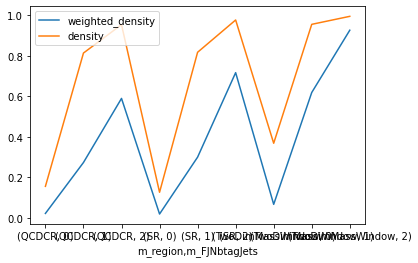

In [9]:
class_distribution["Xtohh3000"].plot()

### Testing Xtohh3000

In [10]:
xtohh3k = datasets["Xtohh3000"]
xtohh3k_SR_1 = ada.filter_tag(ada.filter_region(xtohh3k, "SR"),1)

In [11]:
xtohh3k_SR_1

,sample,EventWeightNoXSec,EventWeight,EventNumber,m_region,m_FJNbtagJets,m_AntiBTag,m_AntiTauTag,m_FJpt,m_FJeta,...,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt,m_hhm_Coll,m_hhm_Eff,m_hhm_ConEff,m_hhm_ConVis,signal
2,Xtohh3000_Hw,0.000215,0.001218,16856,SR,1,4,0,1119.43000,0.743337,...,3.302337,0.052070,230.261640,2581.2793,233.775800,-999.0,2817.0266,1776.9835,3684.4630,1
4,Xtohh3000_Hw,0.000250,0.001412,25697,SR,1,3,0,1080.83230,-0.816572,...,3.690979,-0.010380,446.800720,2075.6934,690.643740,-999.0,2626.5530,1214.9288,2790.2017,1
10,Xtohh3000_Hw,0.000138,0.000779,18616,SR,1,2,0,1347.44680,0.966958,...,3.179263,0.049044,551.810100,2004.8794,732.363000,-999.0,2785.3933,2849.0884,2686.3398,1
17,Xtohh3000_Hw,0.000162,0.000917,15589,SR,1,3,0,1249.93000,0.630004,...,3.259279,-0.033452,454.588530,2338.5483,440.122440,-999.0,2841.6187,1963.4897,2887.8950,1
18,Xtohh3000_Hw,0.000294,0.001662,28388,SR,1,5,0,1051.43640,0.218929,...,3.427173,-0.141603,314.087200,2101.7942,609.684450,-999.0,2496.7705,995.1817,3271.6902,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55780,Zbb,0.929995,0.004631,3775118,SR,1,2,0,659.31750,-0.498314,...,3.285652,0.439522,84.458730,1422.1833,117.770500,-999.0,1509.8374,1298.5731,1963.6682,0
55785,Zl,1.532080,0.007629,3780998,SR,1,3,0,1155.48910,-0.049598,...,2.733104,-0.130584,228.010350,1671.0092,654.887300,-999.0,1947.7340,1624.8837,2325.8188,0
55787,Zbl,0.897816,0.004471,3781886,SR,1,4,0,537.75476,-0.575373,...,2.559346,0.009155,156.438670,826.6153,336.893100,-999.0,1037.8660,714.7258,966.7310,0
55810,stopWt,46.076244,0.315357,3383646,SR,1,3,0,697.98773,-0.007791,...,3.396820,0.148759,98.432304,1713.8885,83.660110,-999.0,1831.3582,1081.3597,1895.3674,0


In [12]:
xtohh3k_SR_1["signal"].sum() / xtohh3k_SR_1.shape[0]

0.8178340903657662

In [14]:
xtohh3k = datasets["Xtohh3000"]
xtohh3k_QCDCR_2 = ada.filter_tag(ada.filter_region(xtohh3k, "QCDCR"),2)

In [22]:
xtohh3k_QCDCR_2.shape

(632, 39)

In [17]:
xtohh3k_QCDCR_2["signal"].sum() / xtohh3k_QCDCR_2.shape[0]

0.9541139240506329

In [18]:
xtohh3k_QCDCR_2.shape[0]

632

In [19]:
xtohh3k_QCDCR_2["signal"].sum()

603